# Import library yg dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.cluster import KMeans

# Membaca dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Persiapan Dataset

In [4]:
df.rename(index=str, columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [5]:
x = df.drop(['CustomerID',	'Gender'], axis=1)

In [6]:
print(x)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# Menentukan jumlah cluster dengan elbow

Text(5, 150000, 'Possible elbow point')

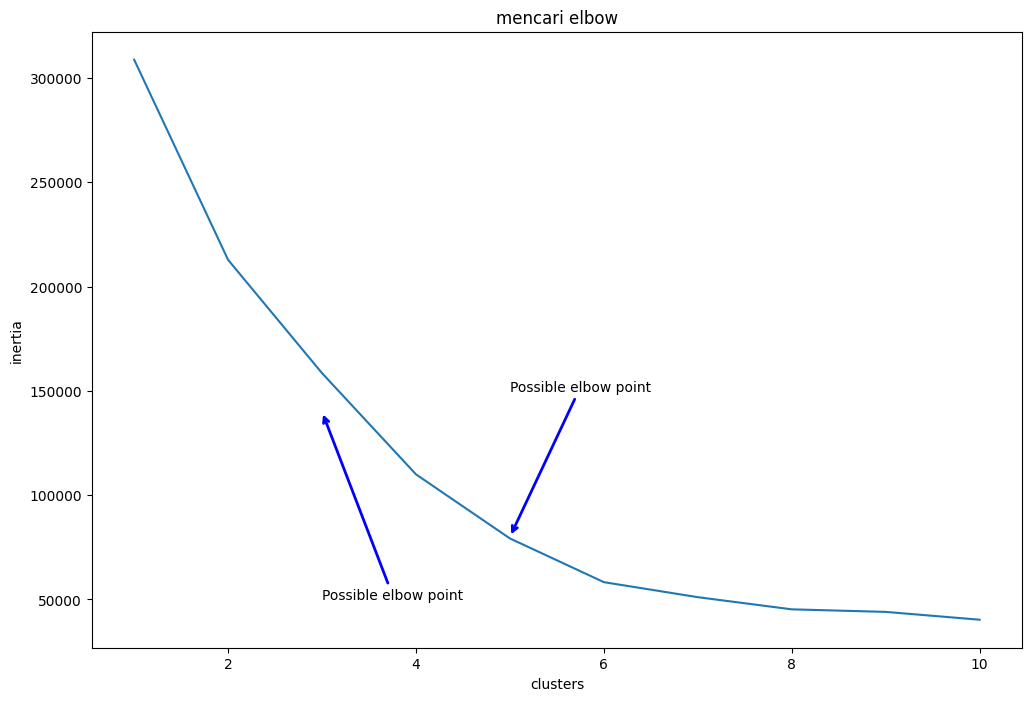

In [10]:
cluster = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(x)
    cluster.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 50000), xycoords='data', arrowprops=dict(arrowstyle='->',
            connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(5, 80000), xytext=(5, 150000), xycoords='data', arrowprops=dict(arrowstyle='->',
            connectionstyle='arc3', color='blue', lw=2))

# Proses clustering

In [11]:
n_clust = 4
kmeans = KMeans(n_clusters=n_clust).fit(x)
x['labels'] = kmeans.labels_

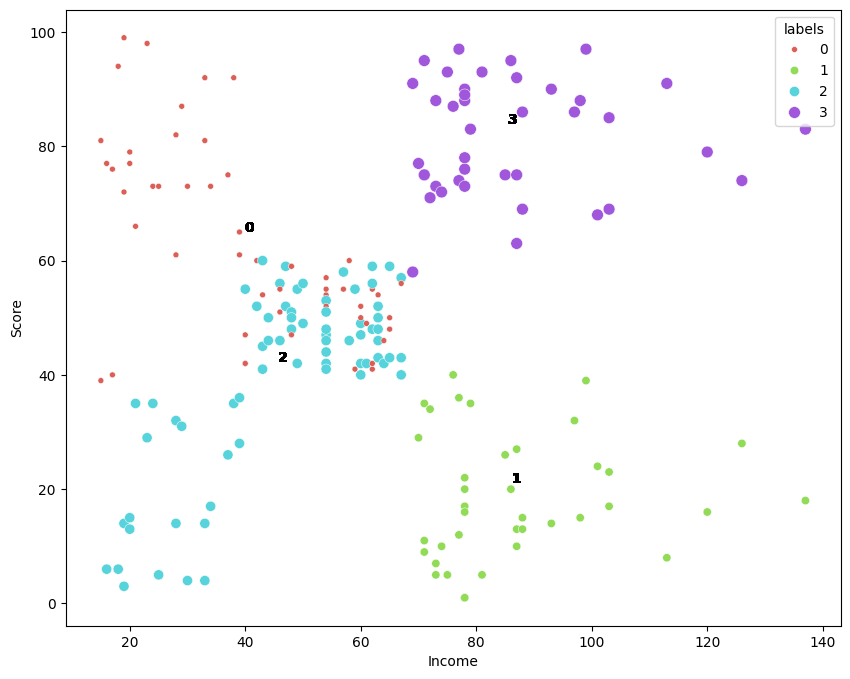

In [13]:
plt.figure(figsize=(10,8))

# Menggunakan keyword arguments x= dan y= untuk mendefinisikan data yang digunakan
sns.scatterplot(x=x['Income'], y=x['Score'], hue=x['labels'], 
                markers=True, size=x['labels'], 
                palette=sns.color_palette('hls', n_clust))

# Menambahkan anotasi ke masing-masing titik
for label in x['labels']:
    plt.annotate(label,
                 (x[x['labels']==label]['Income'].mean(),
                  x[x['labels']==label]['Score'].mean()),
                 textcoords="offset points", xytext=(0,10),
                 ha='center', size=10, weight='bold', color='black')

plt.show()


In [14]:
print(x)

     Age  Income  Score  labels
0     19      15     39       0
1     21      15     81       0
2     20      16      6       2
3     23      16     77       0
4     31      17     40       0
..   ...     ...    ...     ...
195   35     120     79       3
196   45     126     28       1
197   32     126     74       3
198   32     137     18       1
199   30     137     83       3

[200 rows x 4 columns]


In [16]:
x.to_excel("output_cluster.xlsx")